In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [22]:
# Now I will finally dive into the data exploration 

# A good thing to always do with a new dataframe is df.describe
# This really gives us a good feel for the data

df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,r,spark,aws,excel,num_comp,desc_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.001348,0.225067,0.237197,0.522911,1.053908,3869.545822
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.036711,0.417908,0.425651,0.499812,1.384239,1521.495868
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3731.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,4740.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,10051.000000


In [23]:
# Taking a look at my columns for reference while I work

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'num_comp', 'desc_len'],
      dtype='object')

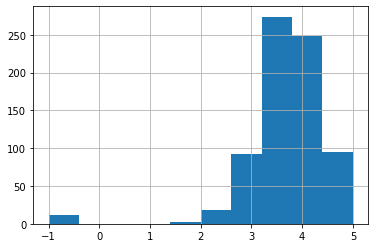

In [24]:
# Next thing to do is check histograms of some of our data to get a feel of the ditribution

df.Rating.hist() # Right skew

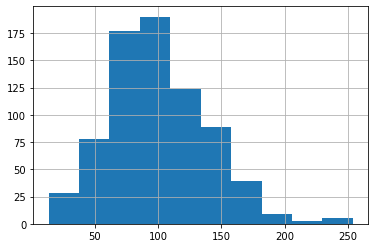

In [25]:
df.avg_salary.hist() # Normal Distribution

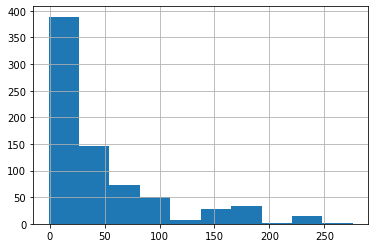

In [26]:
df.age.hist() # Follows an exponential distribution for example

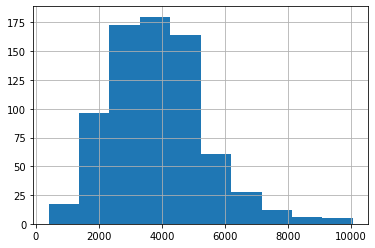

In [27]:
df.desc_len.hist() # Normal distribution

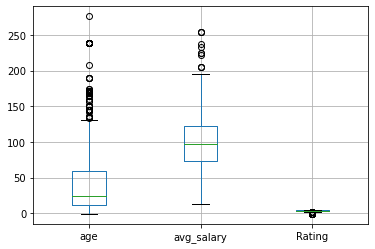

In [28]:
df.boxplot(column = ['age','avg_salary','Rating']) # Shows outliers

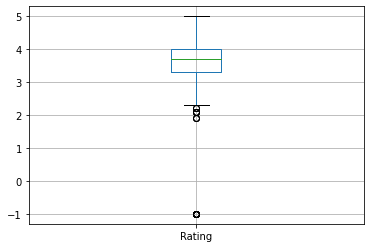

In [29]:
df.boxplot(column = ['Rating']) # Shows us outliers again

# -1 is defined as anything that didn't have a rating

In [30]:
# Next is the correlation of the continuous variables

df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


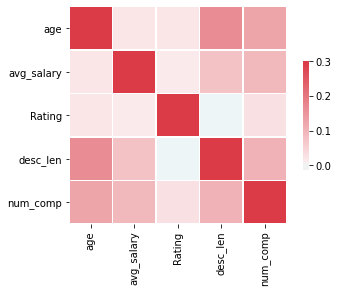

In [31]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3,center=0,cmap=cmap,
           square=True,linewidth=.5,cbar_kws={"shrink": .5})

We can see above that the correlation is a big help to us in understanding the patterns in data. We can see that for example the age of a company is positively correlated to the description length on glassdoor of that company.

In [32]:
# Now looking at categorical variables 

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'num_comp', 'desc_len'],
      dtype='object')

In [33]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue',
    'company_txt', 'job_state', 'same_state', 'python', 'r', 'spark','aws', 'excel',
    'job_simp', 'seniority']] # Make a new dataframe that I can loop through below

Bar Plot for Location: Total = 200


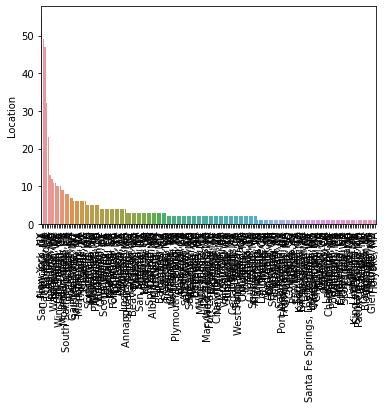

Bar Plot for Headquarters: Total = 198


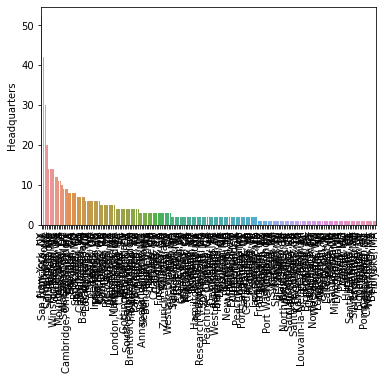

Bar Plot for Size: Total = 9


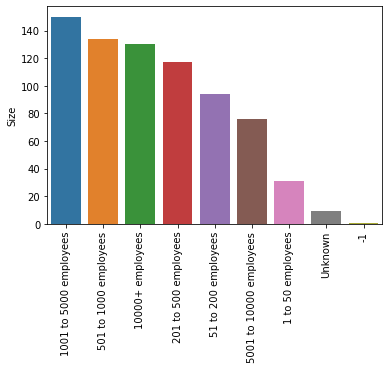

Bar Plot for Type of ownership: Total = 11


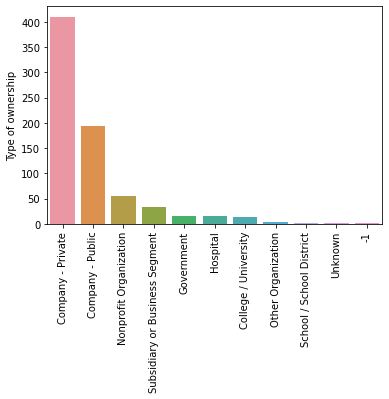

Bar Plot for Industry: Total = 60


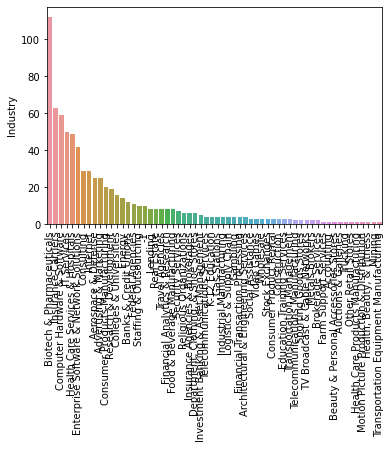

Bar Plot for Sector: Total = 25


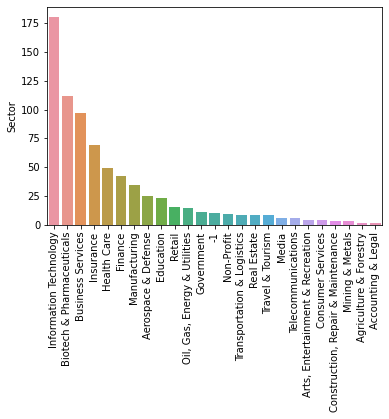

Bar Plot for Revenue: Total = 14


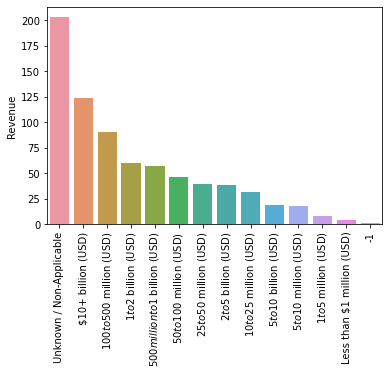

Bar Plot for company_txt: Total = 343


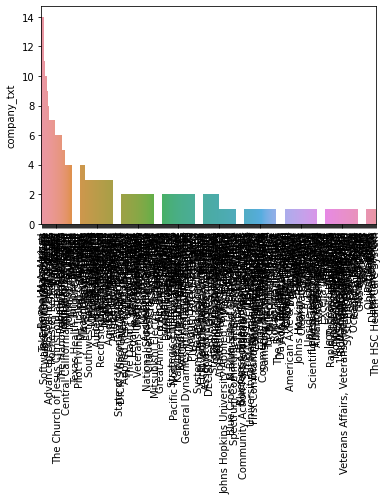

Bar Plot for job_state: Total = 37


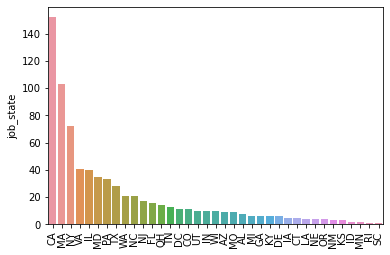

Bar Plot for same_state: Total = 2


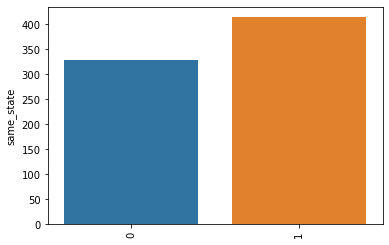

Bar Plot for python: Total = 2


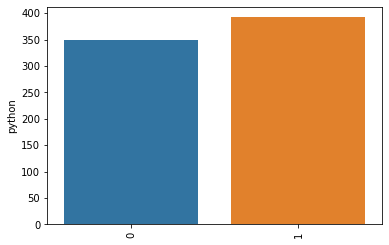

Bar Plot for r: Total = 2


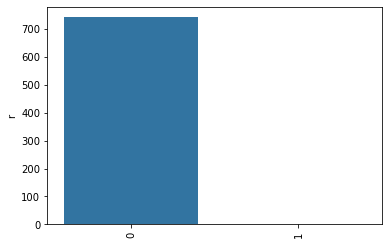

Bar Plot for spark: Total = 2


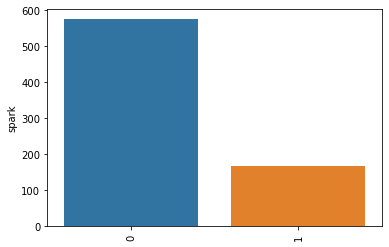

Bar Plot for aws: Total = 2


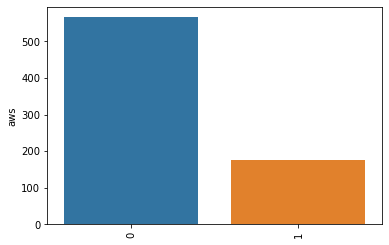

Bar Plot for excel: Total = 2


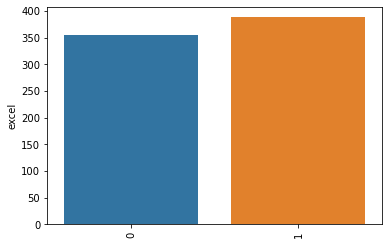

Bar Plot for job_simp: Total = 7


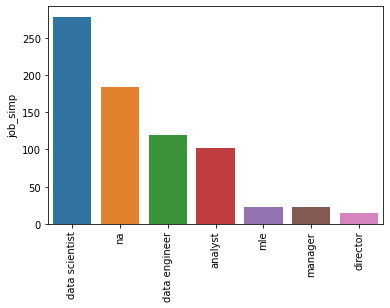

Bar Plot for seniority: Total = 3


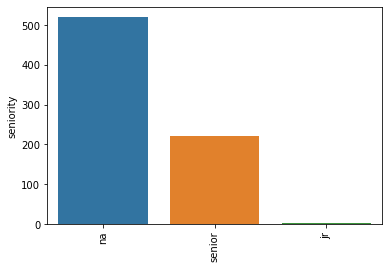

In [63]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Bar Plot for %s: Total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Barplot for Location: Total = 20


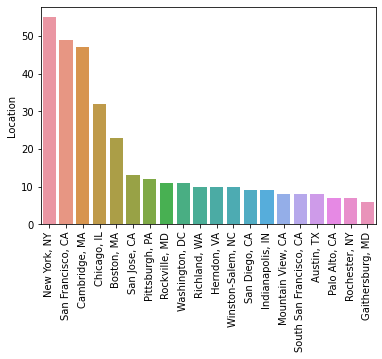

Barplot for Headquarters: Total = 20


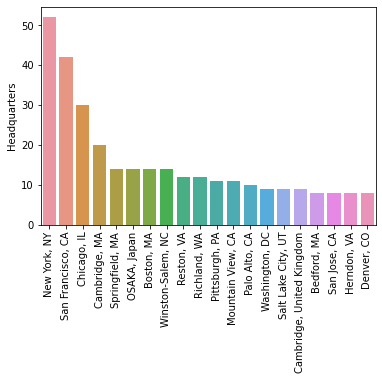

Barplot for company_txt: Total = 20


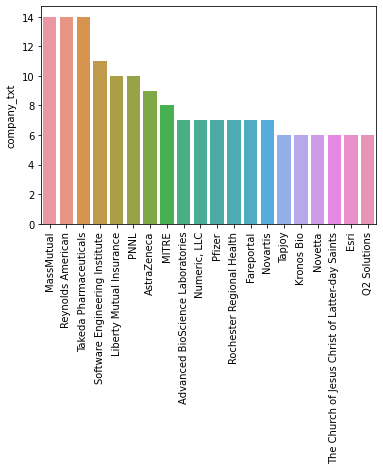

In [64]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Barplot for %s: Total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


In [43]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [44]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [46]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [47]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
          analyst          54.500000
VA        na               79.300000
          mle              87.000000
          data scientist  108.416667
          data engineer    96.900000
          analyst          71.583333
UT        data engineer   100.333333
          analyst          54.750000
          data scientist  140.500000
TX        na               41.285714
          data scientist  100.730769
          data engineer   113.062500
TN        data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        manager         109.666667
          data engineer    91.500000
          data scientist  113.333333
          analyst          62.750000
          mle             120.500000
          na               76.062500
OR        data scientist   98.500000
          data engineer    73.000000
OH        na               91.166667
          data scientist  105.285714
          analyst          53.875000
NY        na               81.583333
          mle             125.000000
          data scientist  115.250000
          data engineer    86.375000
          analyst          65.607143
NM        data scientist   74.333333
NJ        data scientist  106.875000
          analyst          83.583333
          data engineer   112.000000
          manager         109.500000
          director        161.500000
          na               82.500000
NE        na               41.000000
NC        na               90.916667
          data scientist  117.000000
          data engineer   104.250000
MO        na               72.333333
          manager          40.500000
          data scientist  127.666667
          analyst          61.000000
MN        data engineer    95.000000
          analyst          76.000000
MI        manager          87.500000
          data scientist  106.625000
MD        na               88.750000
          data scientist  109.115385
          data engineer   109.000000
          analyst          80.666667
MA        na              107.478261
          manager          71.900000
          director        117.833333
          data scientist  113.750000
          data engineer   107.291667
          analyst          59.125000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
KY        na              103.500000
          data scientist   84.000000
KS        mle              87.000000
IN        na               69.000000
          data scientist   84.500000
          data engineer   114.500000
IL        analyst          66.500000
          na               57.166667
          mle             133.000000
          director        221.750000
          data scientist  117.233333
          data engineer    96.125000
ID        analyst          56.250000
IA        analyst          43.000000
          data engineer   102.833333
GA        data scientist   81.333333
          na               80.000000
FL        data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
CT        na               62.500000
          data scientist   84.000000
CO        mle             100.500000
          data engineer    99.000000
          analyst          29.500000
          na               31.500000
          data scientist  108.666667
CA        na               99.907407
          mle             177.300000
          manager          80.611111
          data scientist  142.522059
          data engineer   129.540000
          analyst          85.

In [48]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [49]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)


,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [52]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python', 'r', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [53]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

When working on all of this kind of analysis its important to keep in the back of your head what insights am I going to pull out of this?

It is very easy to get lots of pretty colours and shapes but the key is to have digestilble substance that people can actually look at and say this is a simple and important piece of info I previously did not have at my disposal

In [55]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

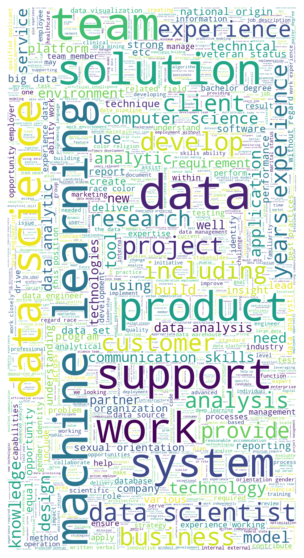

In [61]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()